In [1]:
import json
import os
import math
import librosa

DATASET_PATH = 'C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres'
JSON_PATH = 'C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/data_10.json'
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: genres\blues
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00000.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00000.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00000.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00000.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00000.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00000.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classif

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00007.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00007.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00007.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00007.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00007.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00007.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blue

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00013.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00013.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00013.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00013.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00013.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00013.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00019.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00019.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00019.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00019.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00020.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00020.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blue

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00026.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00026.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00026.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00026.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00026.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00027.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blue

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00034.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00034.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00034.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00034.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00034.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00034.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00041.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00042.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00042.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00042.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00042.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00042.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blue

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00048.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00048.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00048.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00048.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00048.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00048.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blue

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00056.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00056.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00056.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00056.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00056.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00056.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00062.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00062.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00062.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00062.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00062.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00062.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blue

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00069.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00069.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00070.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00070.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00070.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00070.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blue

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00081.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00082.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00082.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00082.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00082.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00082.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blue

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00088.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00088.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00088.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00088.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00088.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00088.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00095.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00095.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00095.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00095.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00095.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues.00095.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\blues\blues

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00001.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00001.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00001.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00001.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00001.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00001.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Co

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00007.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00007.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00008.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00008.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00008.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00008.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/C

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00014.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00014.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00014.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00014.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00014.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00014.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Co

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00020.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00020.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00020.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00020.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00020.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00020.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Co

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00026.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00026.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00026.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00026.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00026.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00026.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Co

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00033.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00033.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00033.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00033.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00033.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00033.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Co

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00038.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00038.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00038.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00038.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00038.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00039.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/C

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00044.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00044.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00044.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00044.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00044.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00044.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Co

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00050.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00050.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00050.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00050.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00050.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00051.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/C

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00056.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00057.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00057.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00057.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00057.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00057.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/C

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00062.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00062.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00062.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00062.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00062.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00062.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/C

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00068.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00068.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00068.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00068.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00068.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00068.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/C

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00075.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00075.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00075.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00075.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00075.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00075.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Co

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00081.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00081.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00081.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00081.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00081.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00081.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Co

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00086.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00086.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00087.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00087.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00087.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00087.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/C

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00093.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00093.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00094.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00094.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00094.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\classical\classical.00094.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/C

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00000.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00000.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00000.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00000.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00000.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00000.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classific

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00006.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00007.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00007.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00007.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00007.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00007.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classifi

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00013.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00013.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00013.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00013.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00013.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00013.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classific

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00019.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00019.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00020.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00020.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00020.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00020.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classifi

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00026.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00026.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00026.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00026.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00026.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00026.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classifi

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00033.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00033.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00033.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00033.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00033.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00033.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classific

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00039.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00039.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00039.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00039.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00039.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00039.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classific

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00046.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00046.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00046.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00046.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00046.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00046.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classific

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00053.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00053.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00054.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00054.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00054.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00054.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classifi

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00060.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00061.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00061.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00061.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00061.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00061.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classifi

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00067.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00067.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00067.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00068.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00068.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00068.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classifi

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00074.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00074.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00074.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00074.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00075.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00075.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classifi

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00082.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00082.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00082.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00082.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00082.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00082.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classific

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00089.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00089.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00089.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00089.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00089.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00089.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classific

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00095.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00095.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00095.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00095.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00096.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\country\country.00096.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classifi

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00002.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00002.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00002.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00002.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00002.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00003.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disc

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00009.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00009.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00009.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00010.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00010.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00010.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disc

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00016.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00017.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00017.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00017.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00017.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00017.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disc

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00024.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00024.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00024.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00024.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00024.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00024.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00031.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00031.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00031.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00031.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00031.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00031.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00039.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00039.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00039.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00039.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00039.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00039.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00046.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00046.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00046.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00046.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00046.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00046.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00053.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00053.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00053.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00053.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00053.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00053.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00060.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00061.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00061.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00061.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00061.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00061.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disc

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00068.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00068.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00068.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00068.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00069.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00069.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disc

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00075.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00075.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00075.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00075.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00075.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00075.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00081.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00081.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00081.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00081.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00081.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00081.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disc

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00089.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00089.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00089.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00089.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00089.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00089.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00096.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00096.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00096.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00096.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00097.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disco.00097.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\disco\disc

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00004.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00004.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00004.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00004.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00004.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00004.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00011.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00011.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00012.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00012.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00012.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00012.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genre

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00019.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00019.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00019.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00019.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00019.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00019.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00025.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00026.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00026.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00026.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00026.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00026.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genre

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00032.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00032.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00032.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00032.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00032.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00032.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00038.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00038.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00038.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00038.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00038.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00038.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00045.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00045.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00045.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00045.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00045.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00046.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genre

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00051.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00051.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00051.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00051.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00052.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00052.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genre

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00059.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00059.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00059.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00059.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00059.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00059.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00066.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00066.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00066.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00066.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00066.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00066.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00074.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00074.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00074.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00074.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00074.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00074.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00080.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00080.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00081.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00081.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00081.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00081.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genre

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00088.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00088.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00088.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00088.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00088.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00088.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00094.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00094.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00094.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00094.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00094.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00094.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00099.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00099.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00099.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\hiphop\hiphop.00099.wav, segment:10

Processing: genres\jazz
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00000.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00000.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Cla

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00005.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00005.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00006.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00006.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00006.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00006.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00006.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00013.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00013.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00013.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00013.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00013.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00013.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00013.wav, se

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00019.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00019.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00020.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00020.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00020.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00020.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00020.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00025.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00025.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00026.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00026.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00026.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00026.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00026.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00032.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00032.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00032.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00032.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00032.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00032.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00032.wav, se

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00037.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00037.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00038.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00038.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00038.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00038.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00038.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00044.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00044.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00044.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00044.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00044.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00044.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00045.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00050.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00050.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00050.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00050.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00050.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00050.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00050.wav, se

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00056.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00057.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00057.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00057.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00057.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00057.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00057.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00063.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00063.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00063.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00063.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00063.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00064.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00064.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00071.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00071.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00071.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00071.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00071.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00071.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00071.wav, se

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00076.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00077.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00077.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00077.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00077.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00077.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00077.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00084.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00084.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00084.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00084.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00084.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00084.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00084.wav, se

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00090.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00090.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00090.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00090.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00091.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00091.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00091.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00097.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00097.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00097.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00097.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00097.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00098.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\jazz\jazz.00098.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00004.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00004.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00004.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00004.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00005.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00005.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\meta

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00011.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00011.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00011.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00011.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00011.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00011.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\meta

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00017.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00017.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00017.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00017.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00017.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00018.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\meta

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00024.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00024.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00024.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00024.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00024.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00024.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00031.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00031.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00031.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00031.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00031.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00031.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00037.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00037.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00037.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00037.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00037.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00037.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00043.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00043.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00043.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00044.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00044.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00044.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\meta

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00050.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00050.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00050.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00050.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00050.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00050.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00056.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00057.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00057.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00057.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00057.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00057.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\meta

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00063.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00063.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00063.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00063.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00063.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00063.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00070.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00070.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00070.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00070.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00070.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00070.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00076.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00076.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00076.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00076.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00076.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00077.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\meta

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00083.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00083.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00083.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00083.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00083.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00083.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00089.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00089.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00089.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00089.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00089.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00089.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00095.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00095.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00095.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00096.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00096.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\metal.00096.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\metal\meta

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00002.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00002.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00002.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00002.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00002.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00002.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00002.wav, segment:7
C:/Use

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00008.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00008.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00008.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00008.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00008.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00008.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00008.wav, segment:9
C:/Use

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00014.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00014.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00014.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00014.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00014.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00014.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00015.wav, segment:1
C:/Us

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00020.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00020.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00021.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00021.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00021.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00021.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00021.wav, segment:5
C:/Us

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00027.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00027.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00027.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00027.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00027.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00027.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00028.wav, segment:1
C:/Us

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00033.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00033.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00033.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00033.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00033.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00034.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00034.wav, segment:2
C:/Us

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00046.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00046.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00047.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00047.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00047.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00047.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00047.wav, segment:5
C:/Us

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00054.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00054.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00054.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00054.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00054.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00054.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00054.wav, segment:9
C:/Use

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00061.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00061.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00061.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00061.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00061.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00061.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00061.wav, segment:7
C:/Use

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00067.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00067.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00067.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00067.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00067.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00067.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00067.wav, segment:8
C:/Use

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00073.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00073.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00073.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00073.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00073.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00073.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00074.wav, segment:1
C:/Us

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00079.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00079.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00080.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00080.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00080.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00080.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00080.wav, segment:5
C:/Us

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00086.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00086.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00086.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00087.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00087.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00087.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00087.wav, segment:4
C:/Us

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00092.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00092.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00092.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00093.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00093.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00093.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00093.wav, segment:4
C:/Us

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00099.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\pop\pop.00099.wav, segment:10

Processing: genres\reggae
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00000.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00000.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00000.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00000.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Class

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00005.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00005.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00005.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00005.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00006.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00006.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genre

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00011.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00011.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00011.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00011.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00011.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00011.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00017.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00017.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00017.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00017.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00018.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00018.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genre

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00024.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00024.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00024.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00024.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00024.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00024.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00030.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00030.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00030.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00030.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00030.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00030.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00036.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00036.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00036.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00036.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00036.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00036.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00042.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00042.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00042.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00042.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00042.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00042.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00048.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00048.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00048.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00048.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00048.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00048.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00054.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00054.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00054.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00054.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00054.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00054.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00060.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00061.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00061.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00061.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00061.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00061.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genre

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00066.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00067.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00067.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00067.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00067.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00067.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genre

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00072.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00072.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00073.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00073.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00073.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00073.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genre

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00079.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00079.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00079.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00079.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00079.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00079.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00085.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00085.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00085.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00085.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00085.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00085.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00091.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00091.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00091.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00091.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00091.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00091.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genre

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00098.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00098.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00098.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00098.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00098.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\reggae\reggae.00098.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00005.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00005.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00005.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00005.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00005.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00005.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00005.wav, se

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00012.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00012.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00012.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00012.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00012.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00012.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00012.wav, se

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00017.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00017.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00017.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00018.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00018.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00018.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00018.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00025.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00025.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00025.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00025.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00025.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00026.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00026.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00032.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00032.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00032.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00033.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00033.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00033.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00033.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00039.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00039.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00039.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00039.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00039.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00039.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00039.wav, se

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00046.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00046.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00046.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00046.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00046.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00046.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00046.wav, se

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00053.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00053.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00053.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00053.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00053.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00053.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00053.wav, se

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00059.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00059.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00059.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00059.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00059.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00060.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00060.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00065.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00065.wav, segment:9
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00065.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00066.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00066.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00066.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00066.wav, s

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00072.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00072.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00072.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00072.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00072.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00072.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00072.wav, se

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00078.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00078.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00078.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00078.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00078.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00078.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00078.wav, se

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00084.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00084.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00084.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00084.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00084.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00084.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00084.wav, se

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00090.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00090.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00090.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00090.wav, segment:6
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00090.wav, segment:7
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00090.wav, segment:8
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00090.wav, se

C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00096.wav, segment:10
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00097.wav, segment:1
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00097.wav, segment:2
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00097.wav, segment:3
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00097.wav, segment:4
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00097.wav, segment:5
C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/genres\rock\rock.00097.wav, s

In [4]:
#### CNN  ####

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 1, 32)        

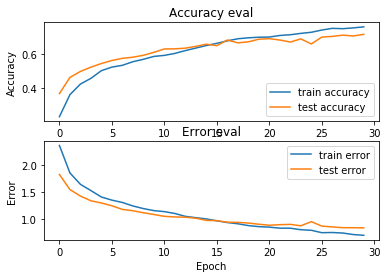

2497/2497 - 1s - loss: 0.7902 - accuracy: 0.7193

Test accuracy: 0.71926314
Target: 6, Predicted label: [6]


In [31]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/data_10.json"


def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))
    
    return prediction

if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    pred = predict(model, X_to_predict, y_to_predict)

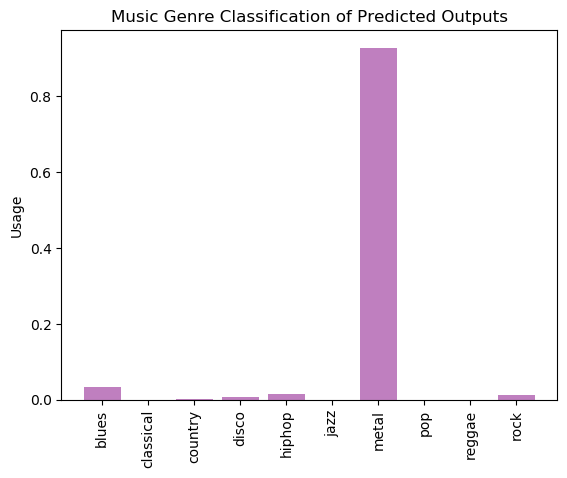

In [113]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock')
y_pos = np.arange(len(objects))
performance = a

plt.bar(y_pos, performance, align='center', alpha=0.5, color='purple')
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Usage')
plt.title('Music Genre Classification of Predicted Outputs')

plt.show()

In [51]:
y = model.predict(X_test)

In [81]:
b = y

s = b.tolist()

In [89]:
t = []
for i in range(len(s)):
    f = s[i]
    t.append(f.index(max(f)))

In [94]:
label_dict = {"blues":0,"classical":1,"country":2,"disco":3,"hiphop":4,"jazz":5,"metal":6,"pop":7,"reggae":8,"rock":9}
    

In [95]:
label_dict.keys()

dict_keys(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])

In [25]:

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
from scipy import interp
import itertools
from itertools import cycle
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

Confusion matrix, without normalization
[[162   0  24   9   3   7  12   0   4   7]
 [  2 236   1   0   0  10   0   1   2   1]
 [ 23   5 175  11   0  14   1   6   5  21]
 [  7   2  10 159   8   0   3  29  20  27]
 [  9   1   2  12 131   1   7  32  29   0]
 [  5  15  13   0   0 191   1   1   1   1]
 [  5   0   2   4   3   1 210   0   0  19]
 [  0   0  10   4   5   3   0 241   4   8]
 [ 12   0  24  22  15   4   0  29 177   6]
 [ 12   1  39  19   3   6   6  13  17 114]]


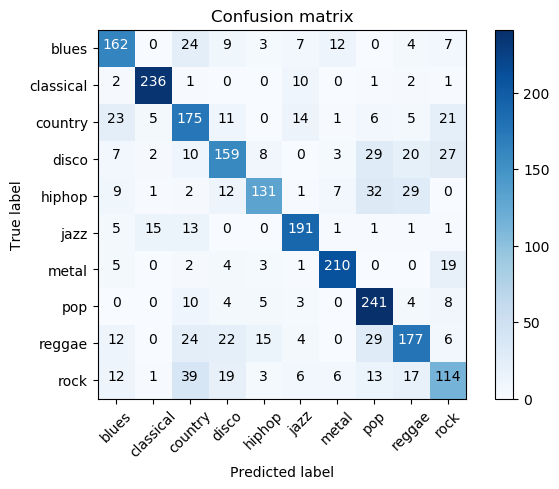

In [96]:
preds = model.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_true=y_test[:len(t)], y_pred=t), 
                      classes=label_dict.keys())

In [100]:
## evaluation of CNN

y_pred = t

import numpy
import tensorflow as tf
tf.executing_eagerly()

m = tf.keras.metrics.Accuracy() 
_ = m.update_state(y_test, y_pred)
print("ACC: ",m.result().numpy())

m = tf.keras.metrics.MeanAbsoluteError() 
_ = m.update_state(y_test, y_pred) 
print("MSE: ",m.result().numpy())


m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(y_test, y_pred)
print('RMSE: ', m.result().numpy())

ACC:  0.71926314
MSE:  1.1221466
RMSE:  2.4014413


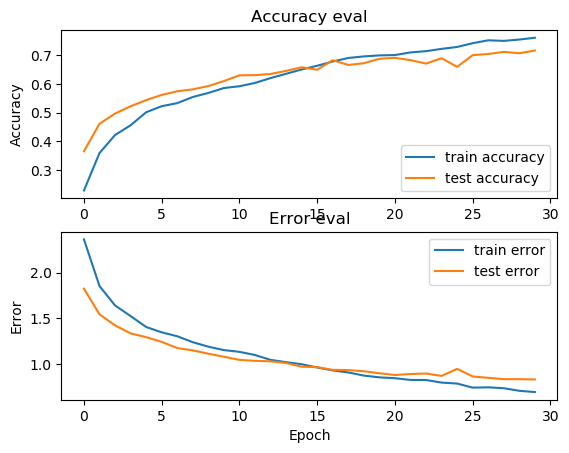

In [101]:
plot_history(history)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 130, 64)           19968     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Train on 5991 samples, validate on 1498 samples
Epoch 1/30
5991/5991 [==============================] - 19s 3ms/samp

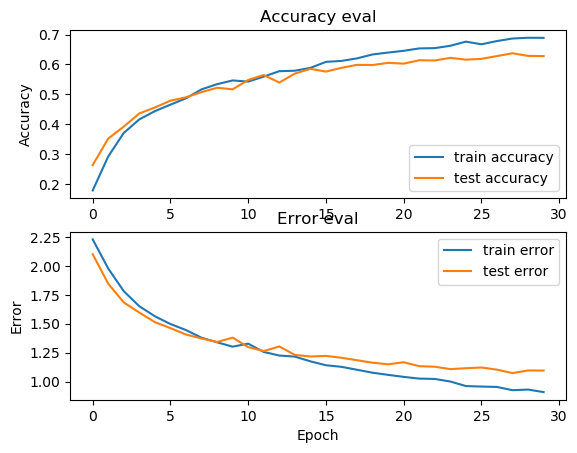

2497/2497 - 2s - loss: 1.0669 - accuracy: 0.6332

Test accuracy: 0.6331598


In [102]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/Music-Genre-Classification/data_10.json"


def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates RNN-LSTM model
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

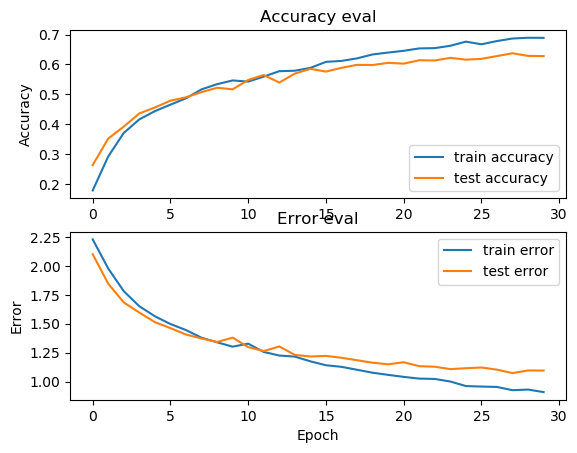

In [103]:
plot_history(history)

In [104]:
y = model.predict(X_test)

b = y

s = b.tolist()

t = []
for i in range(len(s)):
    f = s[i]
    t.append(f.index(max(f)))

In [105]:
## evaluation of RNN

y_pred = t

import numpy
import tensorflow as tf
tf.executing_eagerly()

m = tf.keras.metrics.Accuracy() 
_ = m.update_state(y_test, y_pred)
print("ACC: ",m.result().numpy())

m = tf.keras.metrics.MeanAbsoluteError() 
_ = m.update_state(y_test, y_pred) 
print("MSE: ",m.result().numpy())


m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(y_test, y_pred)
print('RMSE: ', m.result().numpy())

ACC:  0.6331598
MSE:  1.4449339
RMSE:  2.6973934
